In [182]:
import numpy as np
import pandas as pd

In [183]:
#Part 1:
#=======

In [184]:
def monte_carlo_volume_estimator(D, num_trials):
    """
    Objective:
    ----------
        Calculates an approximate value of the unit volume in a space of dimension D using Monte Carlo method.
        The funtion randomly generates a number of points and acsertain whether each point falls into the unit area
        of the space or not. The value of the unit volume in the D-dimensional space is proportional to the
        fraction of the randomly generated points which falls inside the unit area of the space.

    Parameter:
    ----------
        D           : a non-zero positive integer, represents the dimension of the Euclidean space.\n
        num_trials  : a non-zero positive integer, represents the number of points in the D-dimensional space to be
                        randomly generated.

    Returns:
    --------
        a float, which represents the estimated unit volume of the D-dimensional space.
    """
    axis_sqd    = np.random.uniform(-1,1,size=(num_trials,D))**2        # square of coordinates' distance from center along the D axes
    distances   = np.sqrt(np.sum(axis_sqd, axis=1))                     # array of Euclidean distances from the center of coordinate system
    X           = np.where(distances<=1.0,1.0,0.0)                      # assign 1 to distances falling inside unit volume region, 0 otherwise
    return X.mean()                                                     # X.mean() elements represent fraction of points falling inside unit volume region

In [185]:
def get_estimated_volumes(D, num_trials, total_runs):
    """
    Objective:
    ----------
        Uses the function 'monte_carlo_volume_estimator' to estimate the unit volume in a space of dimension D,
        repeating the calculation for a total of 'total_runs'. Note that at each run of the calculation,
        'monte_carlo_volume_estimator' uses a different random collection of points.

    Parameters:
    -----------
        D           : a non-zero positive integer, represents the dimension of the Euclidean space.\n
        num_trials  : a non-zero positive integer, represents the number of points in the D-dimensional space to be
                        randomly generated.\n
        total_runs  : a non-zero positive integer, represents the number of times the 'monte_carlo_volume_estimator'
                        should be run.\n

    Returns:
    --------
        a numpy array containing the estimated value of the unit volume at each run of the function 'monte_carlo_volume_estimator'.\n
    """

    multidimensional_square_area    = 2.0**D            # because I'm using a square of length 2
    return np.array([monte_carlo_volume_estimator(D =D, num_trials=num_trials) 
                        for n in range(total_runs)])*multidimensional_square_area

In [186]:
#NB: This is the function the problem is asking

def calculate_volume(D,block_dim_trials=10**5,total_runs=10):
    """
    Objective:
    ----------
        Estimates the value of a unit volume in a D-dimensional Euclidean space.

    Parameters:
    ----------
        D           : a non-zero positive integer, represents the dimension of the Euclidean space.\n
        num_trials  : a non-zero positive integer, represents the number of points in the D-dimensional space to be
                        randomly generated.\n
        total_runs  : a non-zero positive integer, represents the number of times the 'monte_carlo_volume_estimator'
                        should be run.\n

    Returns:
    --------
        a string indicating the average value of the unit volume and a corresponding standard deviation.\n
    """
    volumes = get_estimated_volumes(D=D, 
                                    num_trials=block_dim_trials,
                                    total_runs=total_runs)
    return str(volumes.mean())+' ± ' +str(volumes.std())

In [187]:
#Example 1: D=1
calculate_volume(D=1)

'2.0 ± 0.0'

In [188]:
# ... for D=1, the standard deviation on the volume simulated is 0 because every point we randomly generate
# falls between -1 and +1 (extrema included).

In [189]:
#Example 2: D=2
calculate_volume(D=2)

'3.14398 ± 0.005408711491658611'

In [190]:
#Example 3: D=3
calculate_volume(D=3)

'4.18712 ± 0.008595142814403947'

In [191]:
#Example 4: D=4
calculate_volume(D=4)

'4.940288 ± 0.02040471161276258'

In [192]:
#Example 5: D=5
calculate_volume(D=5)

'5.291904 ± 0.047395402983833775'

In [193]:
#Part 2: proving the scaling of the standard deviation with N=number of trials
#=============================================================================

def std_volumes(D,N,total_runs=400):
    volumes = get_estimated_volumes(D=D, num_trials=N, total_runs=total_runs)
    return volumes.std()

vec_std_volumes = np.vectorize(std_volumes)

In [194]:
# I want to test this on the list of N, [100*(i**2) for i in range(1,11)]
list_of_N = np.array([100*(i**2) for i in range(1,11)])

In [195]:
list_of_N

array([  100,   400,   900,  1600,  2500,  3600,  4900,  6400,  8100,
       10000])

In [196]:
my_half_log_N = -0.5*np.log10(list_of_N)

In [197]:
my_half_log_N

array([-1.        , -1.30103   , -1.47712125, -1.60205999, -1.69897   ,
       -1.77815125, -1.84509804, -1.90308999, -1.95424251, -2.        ])

In [198]:
# Let sigma:= std of volume calculate 
# If sigma ~ 1/sqrt(N), then Log(sigma) ~ -0.5*Log(N)
# In other words, we should expect a linear relationship between Log(sigma) ~ -0.5*Log(N)
# I use log to be able to go to different orders of magnitude of N, and to make the graph more intelligible
# I want to plot Log(sigma) ~ 0.5*Log(N) and see if there's a linear relationship

In [199]:
%matplotlib inline
from matplotlib import pyplot as plt

In [200]:
from scipy import stats

def plot_logsigma_halflogN(D,list_of_N):
    """
    plots Log(sigma) vs -0.5*Log(N) given dimension D of space and 
    a list of different N (number of trials to run the MC simulation), i.e. list_of_N)
    """
    my_std_data     = vec_std_volumes(D,list_of_N)      #my y
    my_log_std_data = np.log10(my_std_data)
    my_half_log_N   = -0.5*np.log10(list_of_N)          #my x
    
    #Get stats on on the relationship between x and y
    #Store interpolation results as 'fitting_results'
    fitting_results = stats.linregress(my_half_log_N,my_log_std_data)
    slope           = fitting_results.slope
    intercept       = fitting_results.intercept
    rsquared        = fitting_results.rvalue
    
    #Predict y values from x
    predicted_log_std_data = slope*my_half_log_N + intercept*np.ones(len(my_half_log_N))
    
    #Plotting simulated data
    plt.scatter(my_half_log_N,my_log_std_data, label="simulated data points")
    
    #Plotting predicted data
    predicted_line_label = "predicted line: \n * slope = {m} \n * intercept = {q} \n * R-squared = {r2}".format(m=round(slope,4),
                                                                                                        q=round(intercept,4),
                                                                                                        r2=round(rsquared,6))
    plt.plot(my_half_log_N,predicted_log_std_data,color='r', linestyle='--', label=predicted_line_label)
    
    plt.xlabel('-0.5*Log(N)')
    plt.ylabel('Log(sigma)')
    plt.legend()
    plt.title('Dimension of space = {size}'.format(size=D))

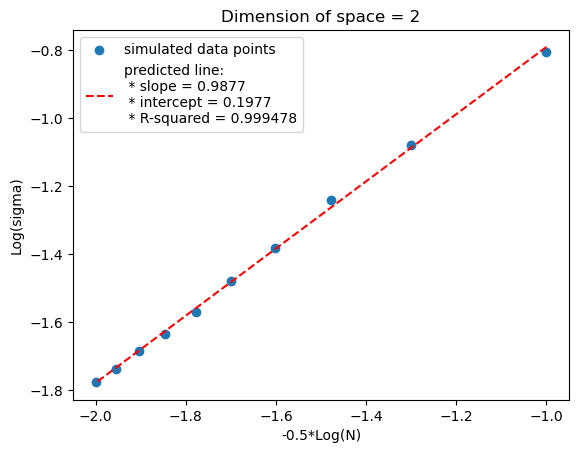

In [201]:
#Example: D=2
plot_logsigma_halflogN(2,list_of_N)

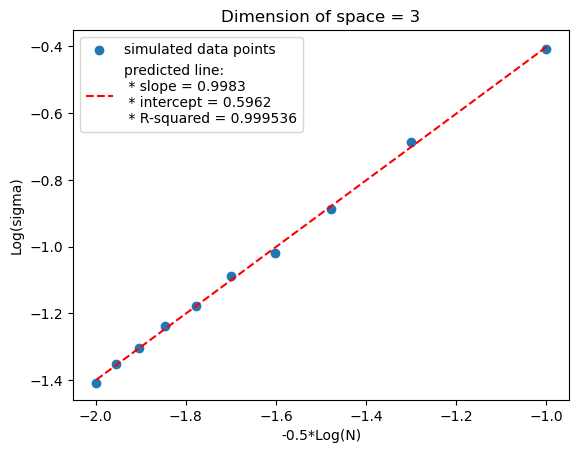

In [202]:
#Example: D=3
plot_logsigma_halflogN(3,list_of_N)

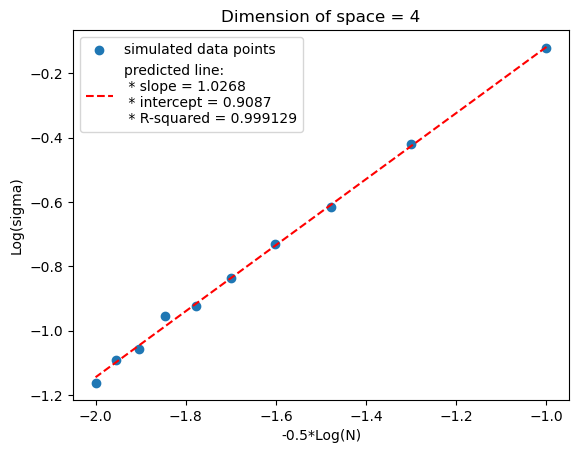

In [203]:
#Example: D=4
plot_logsigma_halflogN(4,list_of_N)

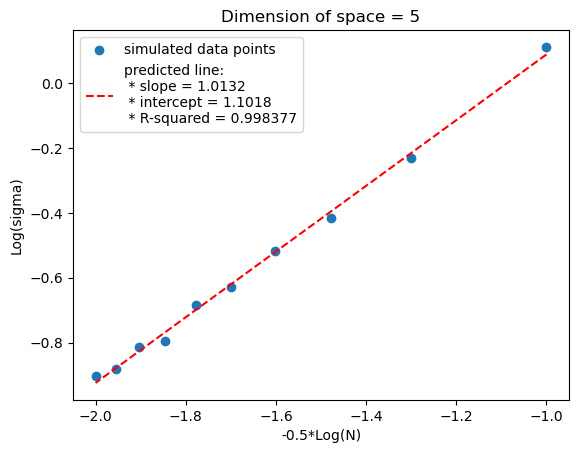

In [204]:
#Example: D=5
plot_logsigma_halflogN(5,list_of_N)

In [205]:
#FINAL COMMENT:
# In the plots above, N increases from right to left. Hence, the more we increase N,
# the smaller Log(sigma) becomes, and hence the smaller sigma becomes -- which is what we should expect.
# All graphs show a linear correlation between Log(sigma) and -0.5*Log(N), with slope ~1, which means that
# ... in the limit N-> +\infinity, Log(sigma) -> -\infinity, and so sigma->0 as the central limit theorem says.